In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [88]:
data = pd.read_csv("data_labels.csv")
data.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q2.4_6 - Topics,Q4.2_4_TEXT - Parent Topics,Q4.2_4_TEXT - Topics,Q1.2 - Parent Topics,Q1.2 - Topics,Q1.6_3_TEXT - Parent Topics,Q1.6_3_TEXT - Topics,Q4.8 - Parent Topics,Q4.8 - Topics,Q4.2_4_TEXT - Topic Hierarchy Level 1
0,2023-10-15 22:24,2023-10-15 22:27,IP Address,98.110.192.37,100,173,True,2023-10-15 22:27,R_32MahROOzVAp2Zn,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-10-15 22:26,2023-10-15 22:29,IP Address,50.159.6.130,100,176,True,2023-10-15 22:29,R_yWwMnNTZPd9hfUd,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-10-15 22:26,2023-10-15 22:30,IP Address,104.251.245.35,100,236,True,2023-10-15 22:30,R_2BgvcU3e8xS2tvq,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-10-15 22:28,2023-10-15 22:31,IP Address,24.118.157.236,100,186,True,2023-10-15 22:31,R_2zhJptFmzj5V1b4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-10-15 22:25,2023-10-15 22:31,IP Address,76.139.188.149,100,364,True,2023-10-15 22:31,R_2bIXeuKlILwSVYt,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Word cloud for community
# Apartment time vs type
# Recycling importance vs rules
# Trash disposal type vs time
Time vs number of sharing
# Word cloud for area description
# bins vs tidiness
# bins vs sharing
Bins full vs sharing
bins vs bins full
Available bin type vs self sorting
# Education vs recycling habit
# Education vs recycling knowledge
# Age vs recycling habit


In [124]:
print(tmp.sum())

print(tmp2.sum())

Non-recycable Trash    38
Cardboard and Paper    21
Electrical Waste       10
Bottles and Cans       21
Plastic                17
General Recycle        35
Composed Trash         20
dtype: int64
Non-recycable Trash sort    38
Cardboard and Paper sort    16
Electrical Waste sort        4
Bottles and Cans sort       22
Plastic sort                15
General Recycle sort        27
Composed Trash sort          6
dtype: int64


[Text(0.5, 23.52222222222222, 'Available type of bins'),
 Text(50.7222222222222, 0.5, 'Sorting done')]

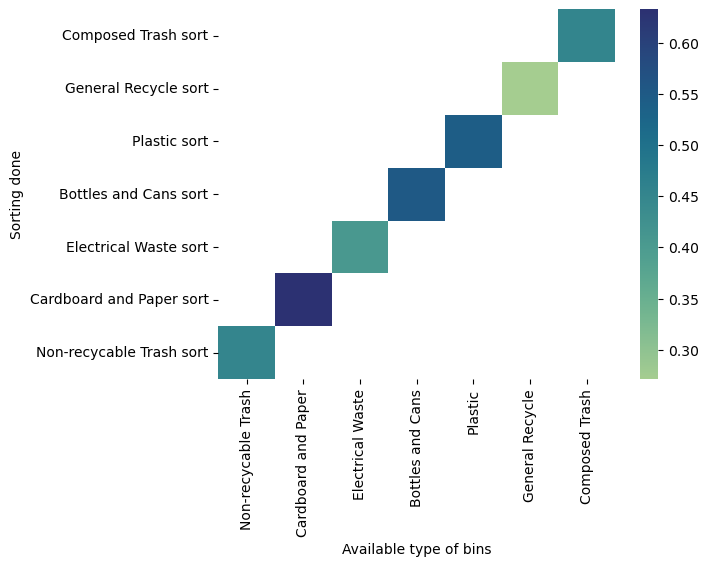

In [116]:
# 3.3 self sort

tmp = pd.DataFrame()

tmp["Non-recycable Trash"] = (data["Q2.8_1"]>=1).astype(int)
tmp["Cardboard and Paper"] = (data["Q2.8_2"]>=1).astype(int)
tmp["Electrical Waste"] = (data["Q2.8_3"]>=1).astype(int)
tmp["Bottles and Cans"] = (data["Q2.8_4"]>=1).astype(int)
tmp["Plastic"] = (data["Q2.8_5"]>=1).astype(int)
tmp["General Recycle"] = (data["Q2.8_6"]>=1).astype(int)
tmp["Composed Trash"] = (data["Q2.8_7"]>=1).astype(int)

cats = ["Non-recycable Trash", "Cardboard and Paper","Electrical Waste",
"Bottles and Cans","Plastic","General Recycle","Composed Trash"]
tmp2 = []
for idx, row in data.iterrows():
    l = []
    val = set(row['Q3.3'].split(","))
    for cat in cats:
        if cat in val:
            l.append(1)
        else:
            l.append(0)
    tmp2.append(l)

newcats = []
for i in cats:
    newcats.append(i+" sort")
tmp2 = pd.DataFrame(tmp2,columns=newcats)

merged_df = pd.concat([tmp, tmp2], axis=1)

# Calculate the correlation matrix
correlation_matrix = merged_df.corr()
matrix = [[1 for i in range(7)] for j in range(7)]
for i in range(7):
    for j in range(7):
        if i==6-j:
            matrix[i][j]=0

s = sns.heatmap(correlation_matrix[cats][:6:-1],mask=np.array(matrix),cmap="crest")
s.set(xlabel='Available type of bins', ylabel='Sorting done')


[Text(0.5, 0, 'Education level'), Text(0, 0.5, 'Recycling knowledge')]

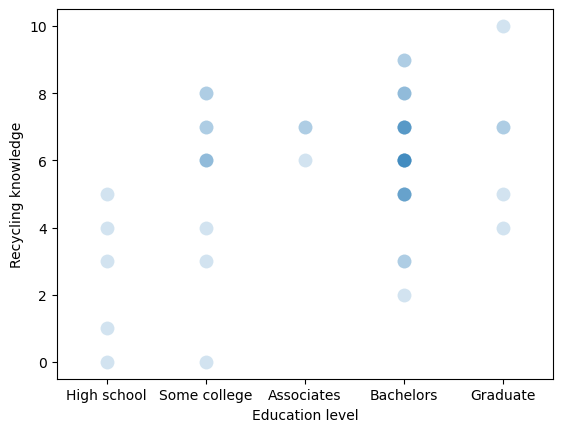

In [133]:

data.loc[data["Q4.4"] == "High school diploma or GED", "Q4.4"] = "High school"
data.loc[data["Q4.4"] == "Some college, but no degree", "Q4.4"] = "Some college"
data.loc[data["Q4.4"] == "Associates or technical degree", "Q4.4"] = "Associates"
data.loc[data["Q4.4"] == "Bachelor’s degree", "Q4.4"] = "Bachelors"
data.loc[data["Q4.4"] == "Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS etc.)", "Q4.4"] = "Graduate"

s = sns.stripplot(data = data,
              x='Q4.4', y='Q4.5', 
              order = ["High school","Some college","Associates","Bachelors","Graduate"], size =10,alpha=0.2, jitter=False)
s.set(xlabel='Education level', ylabel='Recycling knowledge')


<Axes: >

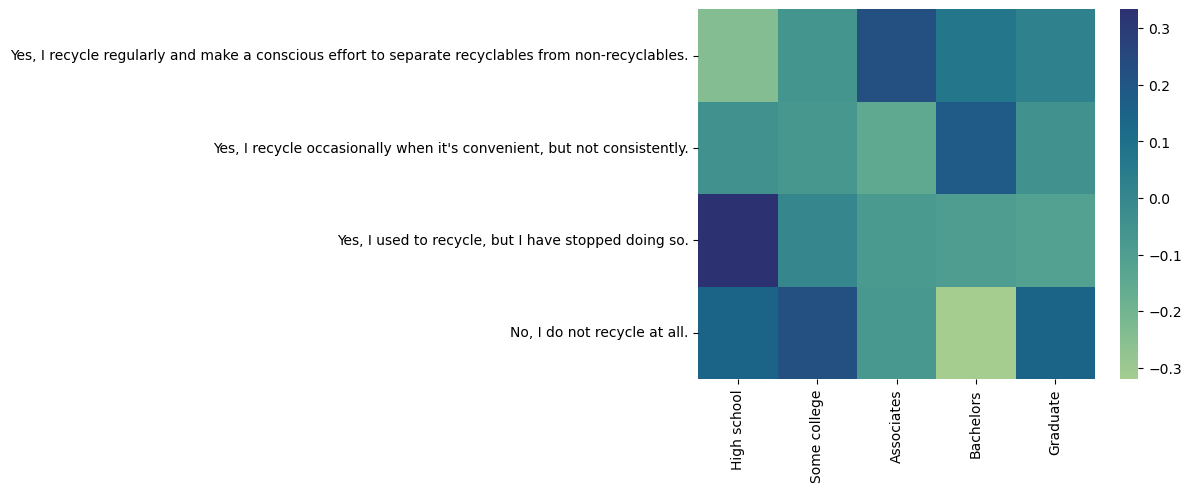

In [130]:
# 4.4 edu

edu = pd.get_dummies(data["Q4.4"],columns=['Q4.4'])
habit = pd.get_dummies(data["Q3.1"],columns=["Q3.1"])

ed_col = ["High school","Some college","Associates","Bachelors","Graduate"]

habit = habit[["No, I do not recycle at all.","Yes, I used to recycle, but I have stopped doing so.",
"Yes, I recycle occasionally when it\'s convenient, but not consistently.",
"Yes, I recycle regularly and make a conscious effort to separate recyclables from non-recyclables."]]

edu = edu[ed_col]
merged_df = pd.concat([edu, habit], axis=1)

# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

sns.heatmap(correlation_matrix[ed_col][:4:-1],cmap="crest")



[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Recycling habit')]

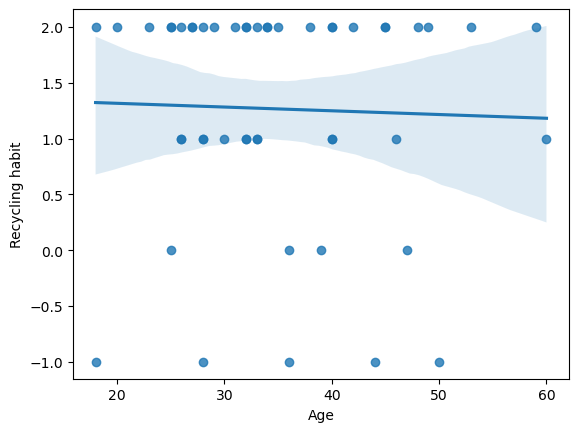

In [132]:
# age 4.1
# recycle habit 3.1

tmp = pd.DataFrame()

tmp["age"] = data['Q4.1']
tmp["habit"] = data["Q3.1"].map({'Yes, I recycle regularly and make a conscious effort to separate recyclables from non-recyclables.': 2,
 'Yes, I used to recycle, but I have stopped doing so.': -1 , 
 "Yes, I recycle occasionally when it's convenient, but not consistently.":1 , 
 "No, I do not recycle at all." :0,
 "I'm not sure if my household recycles.":0})

s = sns.regplot(x="age", y="habit", data=tmp)
s.set(xlabel='Age', ylabel='Recycling habit')


In [ ]:
# 2.3 sharing

tmp = pd.DataFrame()

tmp["total_bins"] = data["Q2.8_1"] + data["Q2.8_2"]+ data["Q2.8_3"] +data["Q2.8_4"]+data["Q2.8_5"]+data["Q2.8_6"]+data["Q2.8_7"]
tmp['total_bins'].where(tmp['total_bins'] <= 15, 15, inplace=True)
tmp["sharing"] = data["Q2.3"].map({'less than 10': 10, '10~30': 20 , "30~50":40 , "over 50" :60})

sns.regplot(x="total_bins", y="sharing", data=tmp)

<Axes: xlabel='total_bins', ylabel='sharing'>

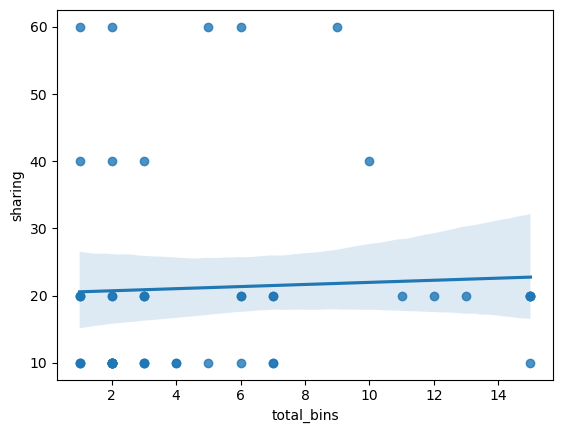

In [27]:
# 2.3 sharing

tmp = pd.DataFrame()

tmp["total_bins"] = data["Q2.8_1"] + data["Q2.8_2"]+ data["Q2.8_3"] +data["Q2.8_4"]+data["Q2.8_5"]+data["Q2.8_6"]+data["Q2.8_7"]
tmp['total_bins'].where(tmp['total_bins'] <= 15, 15, inplace=True)
tmp["sharing"] = data["Q2.3"].map({'less than 10': 10, '10~30': 20 , "30~50":40 , "over 50" :60})

sns.regplot(x="total_bins", y="sharing", data=tmp)

In [ ]:
tmp

<Axes: xlabel='total_bins', ylabel='tidy'>

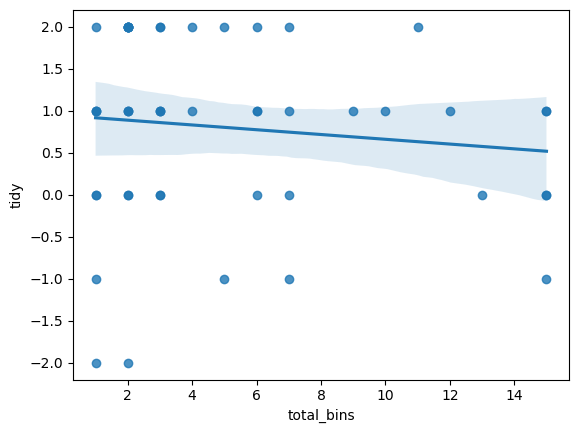

In [28]:
# bins vs tidiness
# 2.5 tidy
# bins 2.8 
tmp = pd.DataFrame()

tmp["total_bins"] = data["Q2.8_1"] + data["Q2.8_2"]+ data["Q2.8_3"] +data["Q2.8_4"]+data["Q2.8_5"]+data["Q2.8_6"]+data["Q2.8_7"]
tmp['total_bins'].where(tmp['total_bins'] <= 15, 15, inplace=True)
tmp["tidy"] = data["Q2.5"].map({'Very Messy': -2, 'Messy': -1 , "Neutral":0 , "Tidy" :1, "Very Tidy":2})

sns.regplot(x="total_bins", y="tidy", data=tmp)
# tmp

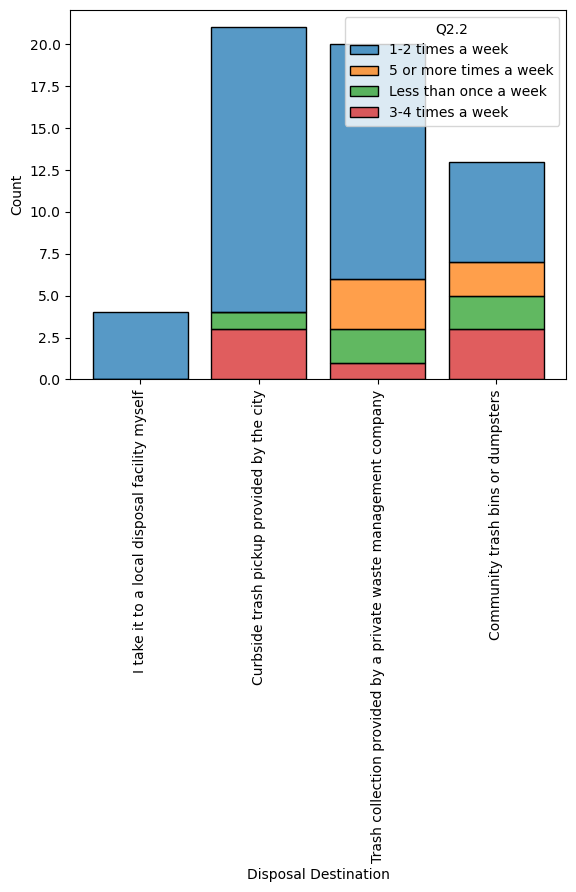

In [16]:
# disposal type 2.1
# times 2.2
tmp =  data.assign(**{"Q2.1":data["Q2.1"].str.split(',')})

tmp = tmp.explode("Q2.1")

# data['Q1.3'] = pd.Categorical(data['Q1.3'], ['Less than 1 year','1-3 years','4-7 years', '8-10 years','More than 10 years'])
# data =data.rename(columns={"Q1.4":"House ownership type"})
ax = sns.histplot( x="Q2.1", hue="Q2.2", data=tmp, stat="count", multiple="stack", shrink=.8)
ax.set(xlabel='Disposal Destination')
ax.tick_params(axis='x', rotation=90)
plt.show()


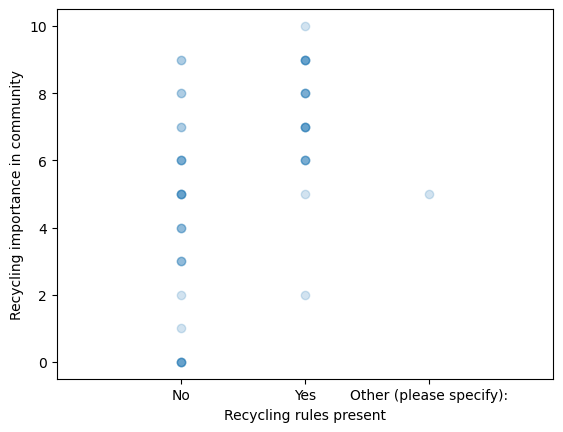

In [44]:

plt.scatter(data["Q1.6"], data["Q1.5"],alpha=0.2)
plt.margins(x=0.5)
plt.gca().update(dict(xlabel='Recycling rules present', ylabel='Recycling importance in community'))
plt.show()

In [ ]:
data['Q1.3'] = pd.Categorical(data['Q1.3'], ['Less than 1 year','1-3 years','4-7 years', '8-10 years','More than 10 years'])
data =data.rename(columns={"Q1.4":"House ownership type"})
ax = sns.histplot( x="Q1.3", hue="House ownership type", data=data, stat="count", multiple="stack", shrink=.8)
ax.set(xlabel='Time living in the community')
ax.tick_params(axis='x', rotation=60)
plt.show()